In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('train.csv')
del df['signup_date']

In [50]:
df.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32,Montana,Free,Yearly,2,Paypal,Medium,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64,New Jersey,Free,Monthly,3,Paypal,Low,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51,Washington,Premium,Yearly,2,Credit Card,High,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63,California,Family,Yearly,4,Apple Pay,Medium,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54,Washington,Family,Monthly,3,Paypal,High,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


In [51]:
df.isna().sum()

,0
customer_id,0
age,0
location,0
subscription_type,0
payment_plan,0
num_subscription_pauses,0
payment_method,0
customer_service_inquiries,0
weekly_hours,0
average_session_length,0


## No empty records.

In [52]:
df.duplicated().sum()

np.int64(0)

#### No duplicated records.

#### Univariate Visualization

In [53]:
df_num = df.select_dtypes(include='number')
df_num.drop(columns = ['customer_id','num_subscription_pauses','churned'],inplace=True)

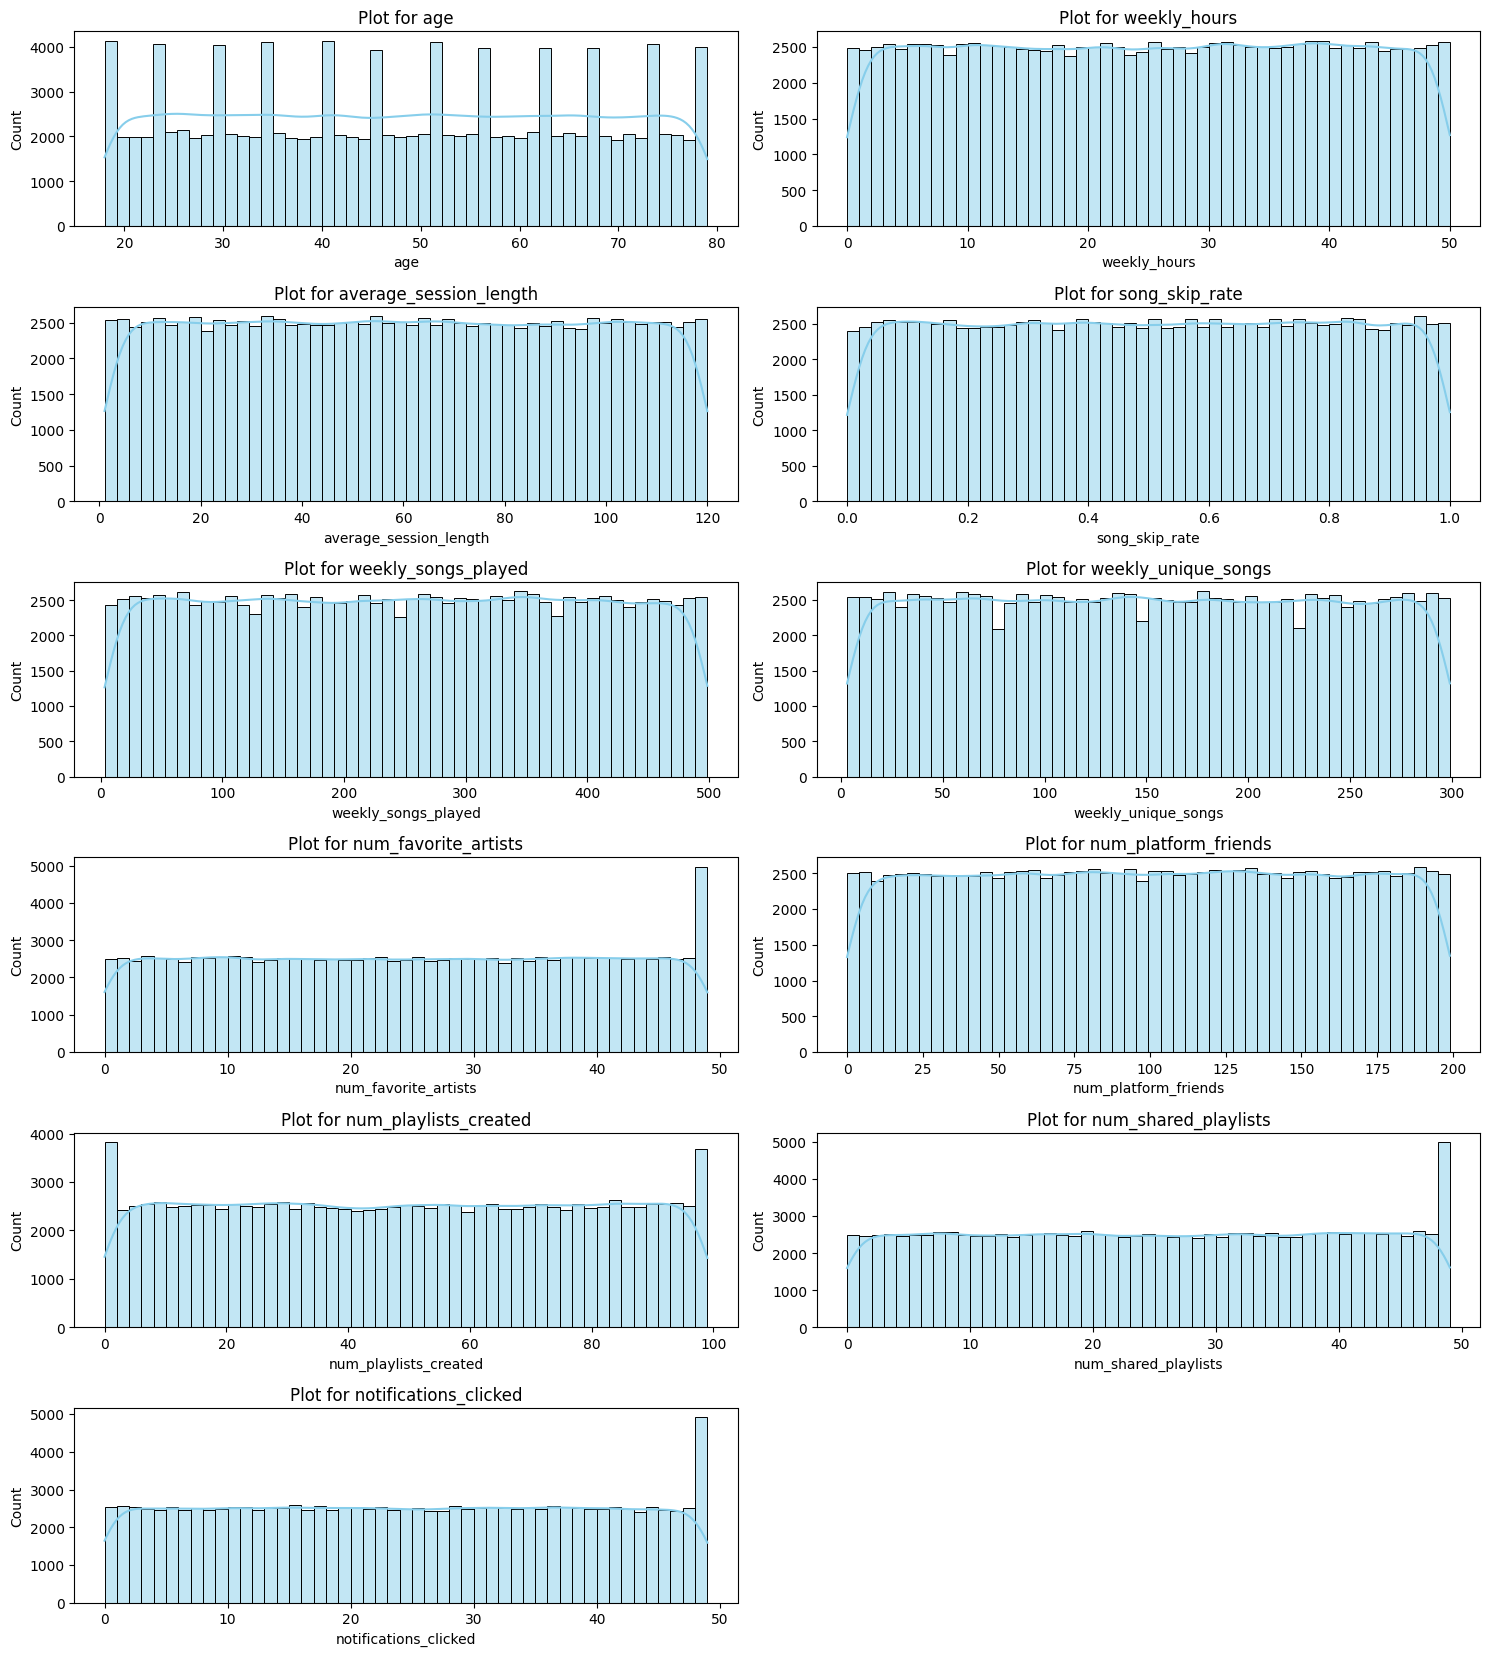

In [54]:
num_cols = list(df_num.columns)

plt.figure(figsize=(15, 30))

for i,col in enumerate(num_cols,1):
  plt.subplot(len(num_cols), 2,i)
  sns.histplot(df[col], kde=True, color = 'skyblue')
  plt.title(f'Plot for {col}')

plt.tight_layout()
plt.show()

In [55]:
df_cat = df[['location','subscription_type','payment_plan','num_subscription_pauses','payment_method','customer_service_inquiries','churned']]

In [56]:
df_cat.head()

,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,churned
0,Montana,Free,Yearly,2,Paypal,Medium,0
1,New Jersey,Free,Monthly,3,Paypal,Low,1
2,Washington,Premium,Yearly,2,Credit Card,High,0
3,California,Family,Yearly,4,Apple Pay,Medium,0
4,Washington,Family,Monthly,3,Paypal,High,0


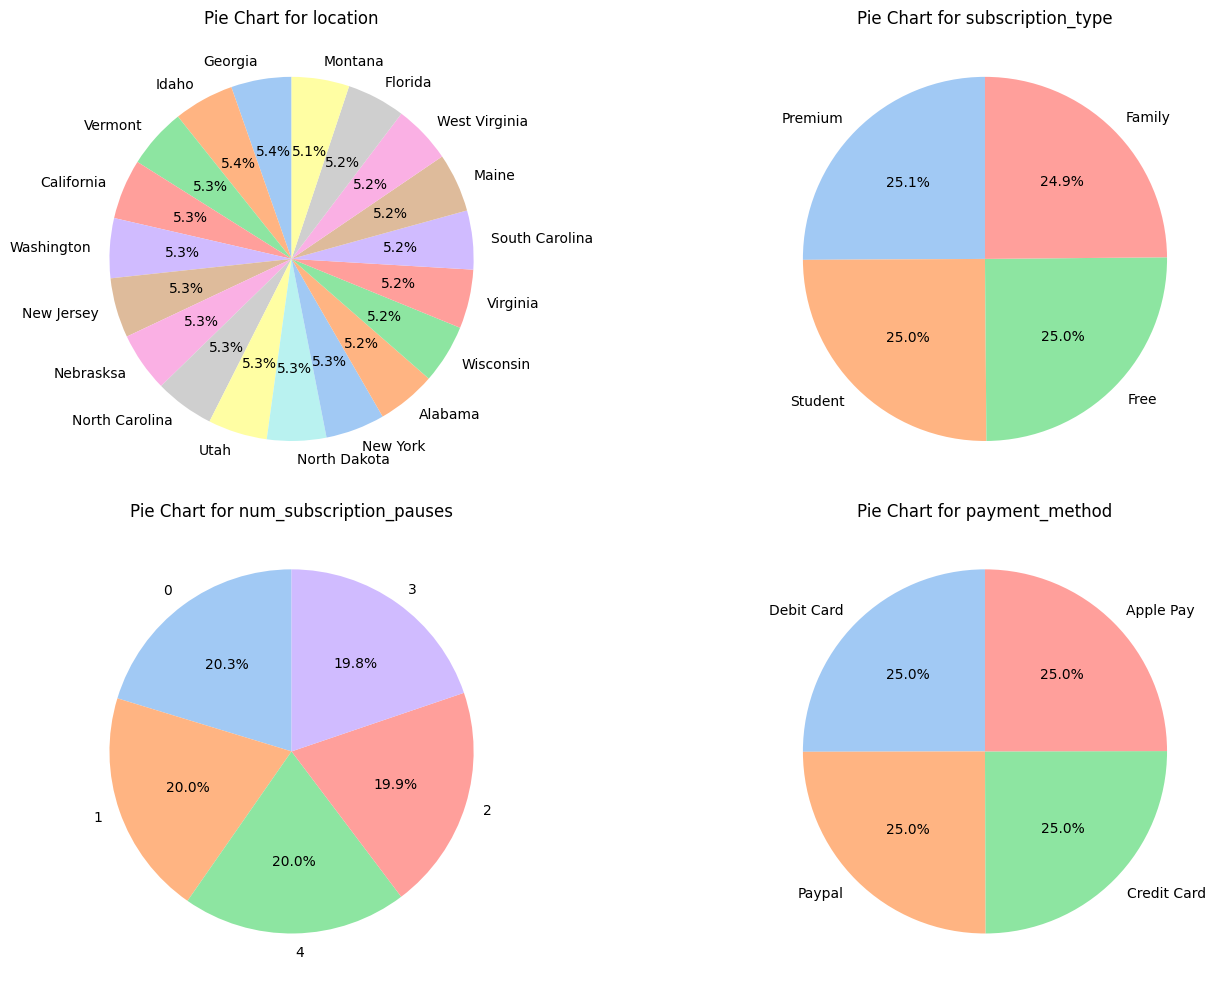

In [57]:
df_pie = df_cat[['location','subscription_type','num_subscription_pauses','payment_method']]

plt.figure(figsize=(15, 10))
for i, col in enumerate(df_pie.columns, 1):
    plt.subplot(2, 2, i)
    data = df_pie[col].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart for {col}')
plt.tight_layout()
plt.show()


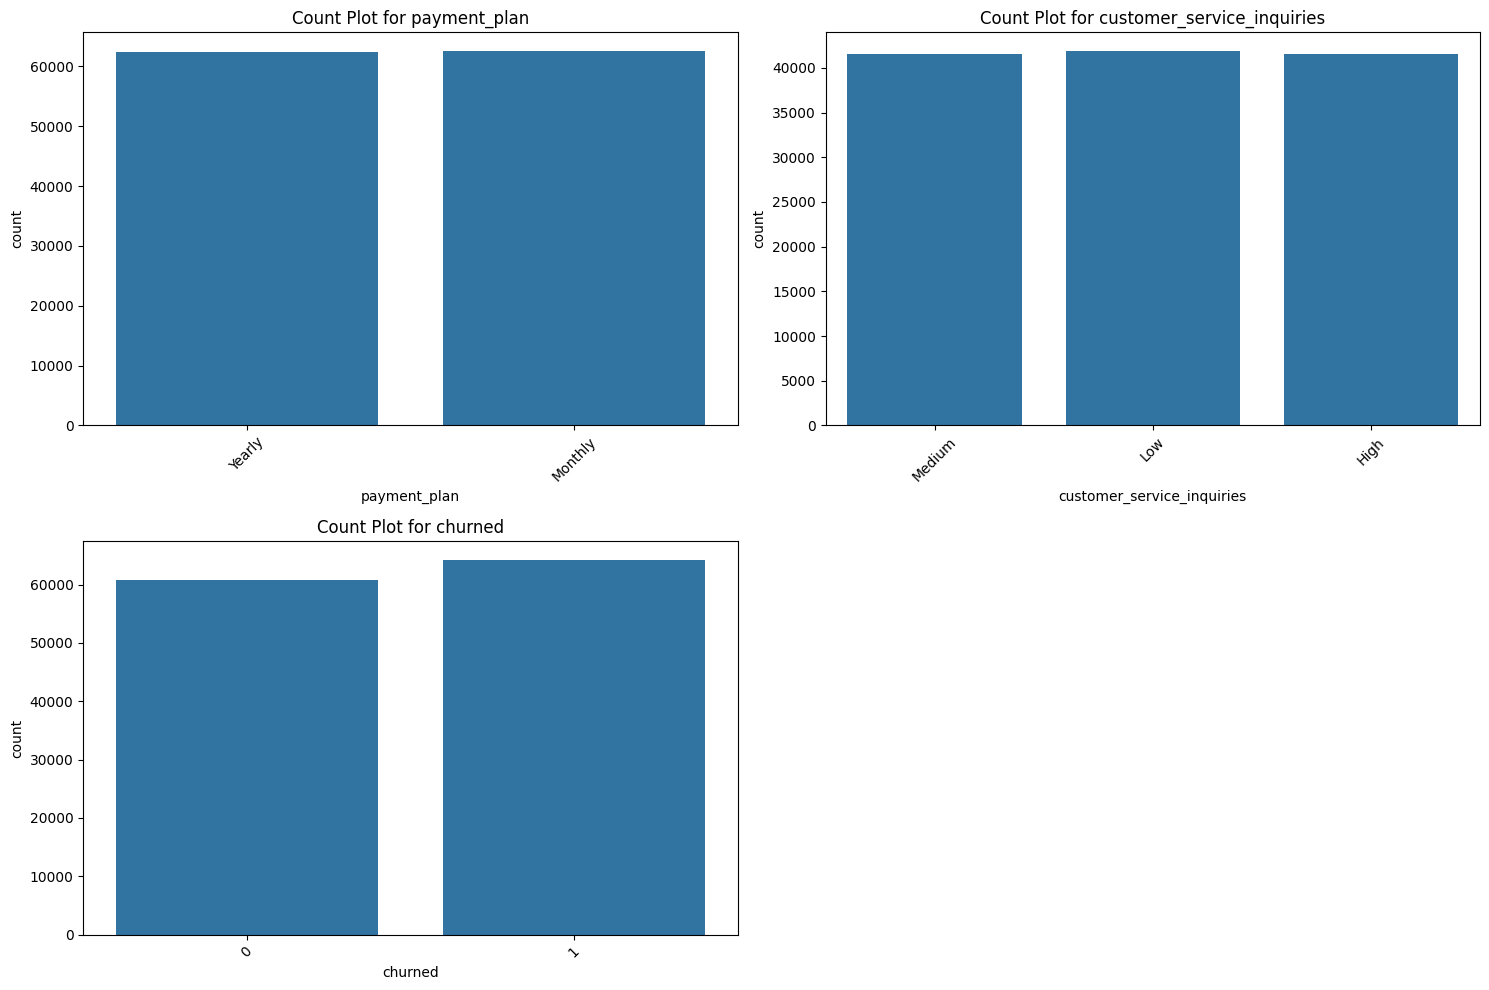

In [58]:
df_count = df_cat[['payment_plan','customer_service_inquiries','churned']]
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_count.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df_count)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Visualizations

In [59]:
df_num = df.select_dtypes(include='number')
df_num.drop(columns = ['customer_id','num_subscription_pauses'],inplace=True)

In [60]:
df_num.columns

Index(['age', 'weekly_hours', 'average_session_length', 'song_skip_rate',
       'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists',
       'num_platform_friends', 'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked', 'churned'],
      dtype='object')

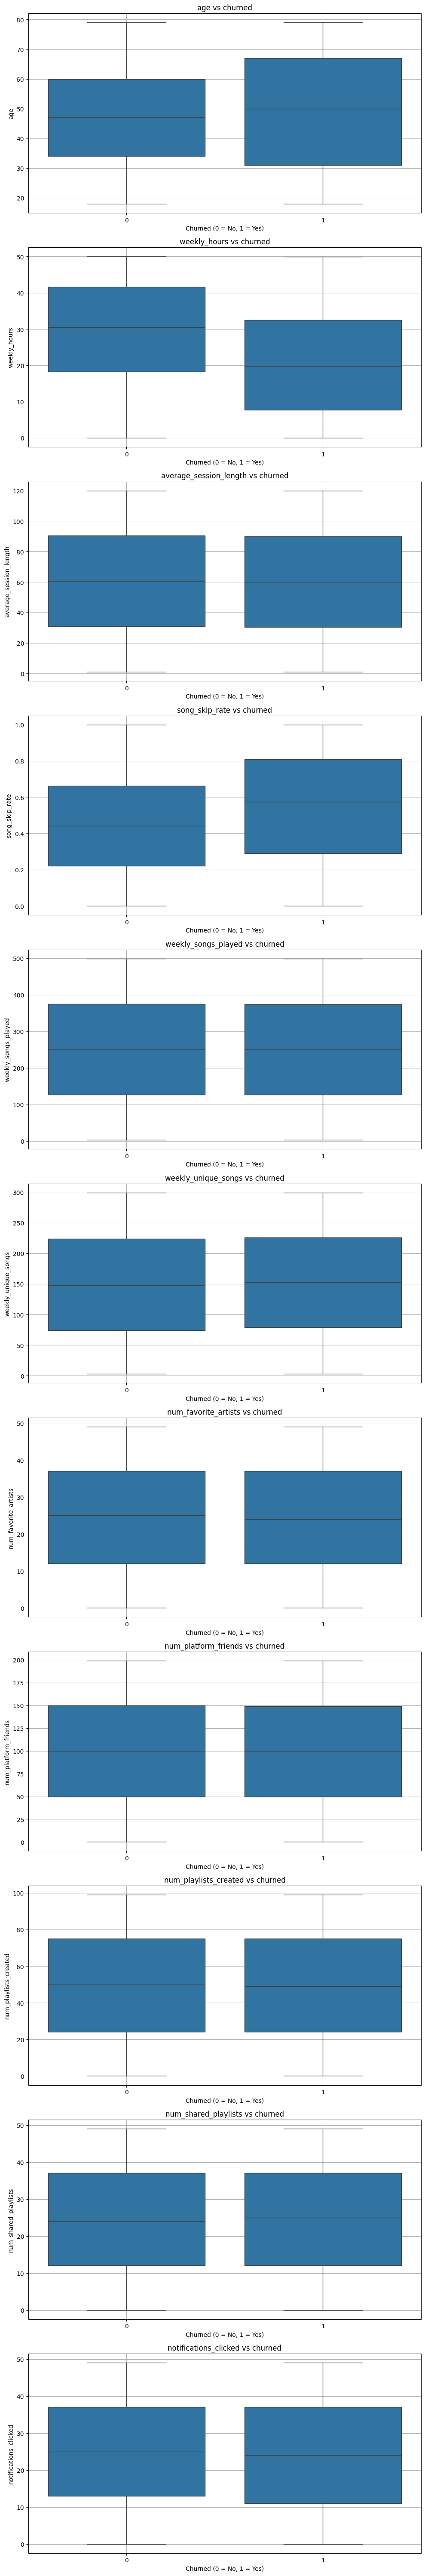

In [61]:
target = 'churned'
num_cols = [
    'age', 'weekly_hours', 'average_session_length', 'song_skip_rate',
       'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists',
       'num_platform_friends', 'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked'
]

plt.figure(figsize=(10, 60))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=target, y=col, data=df, showfliers=False)
    plt.title(f'{col} vs {target}')
    plt.xlabel('Churned (0 = No, 1 = Yes)')
    plt.grid(True)

plt.tight_layout()
plt.show()

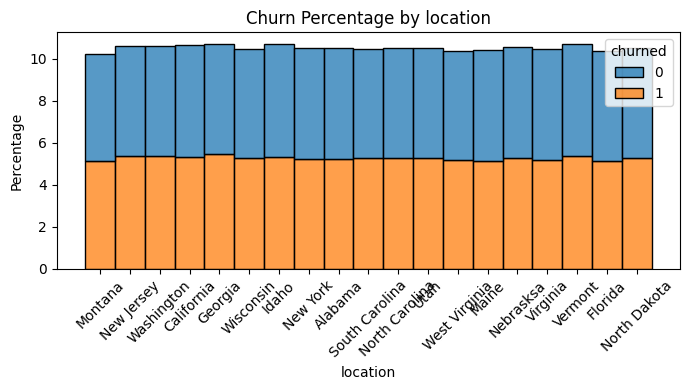

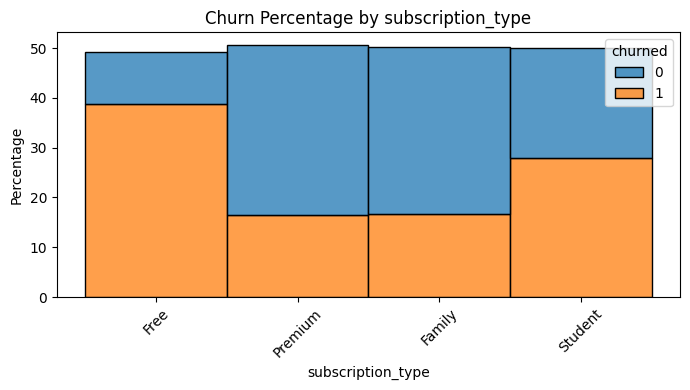

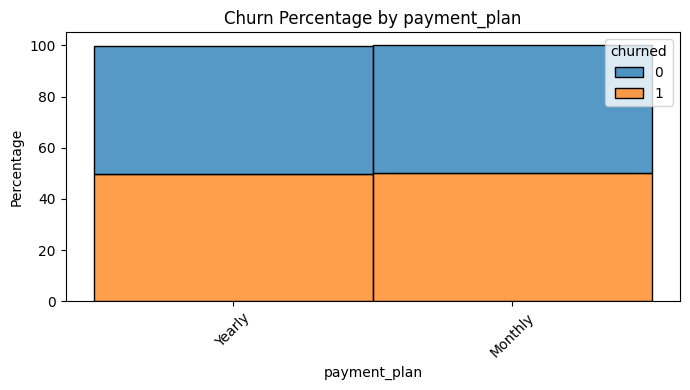

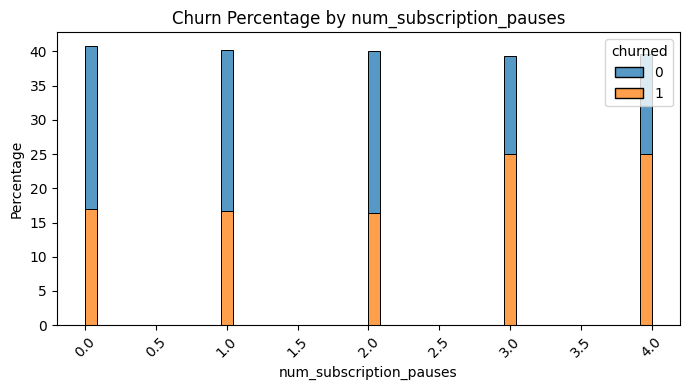

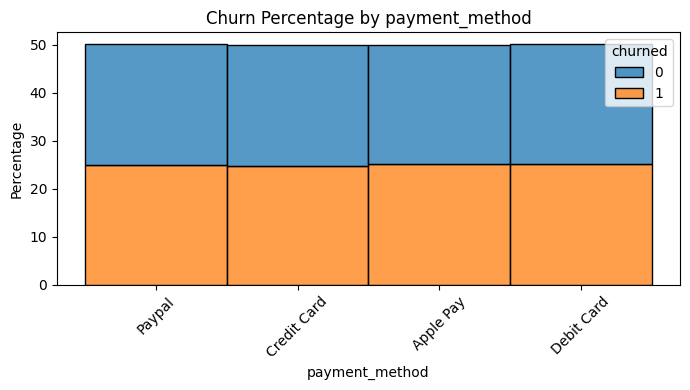

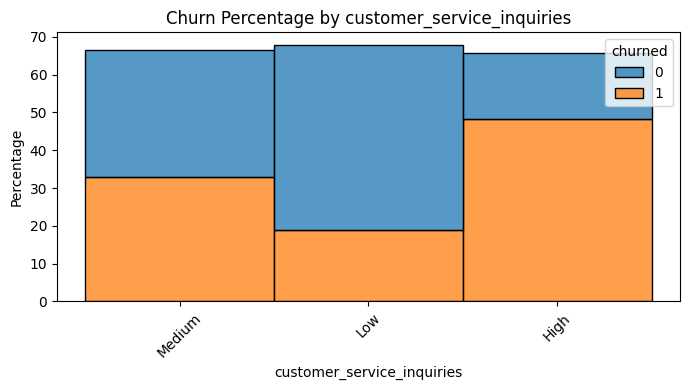

In [62]:
df_cat = df[['location','subscription_type','payment_plan','num_subscription_pauses','payment_method','customer_service_inquiries','churned']]


target = 'churned'
cat_cols = [
    'location',
    'subscription_type',
    'payment_plan',
    'num_subscription_pauses',
    'payment_method',
    'customer_service_inquiries']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(
        data=df,
        x=col,
        hue=target,
        multiple='stack',
        stat='percent',
        common_norm=False
    )
    plt.title(f'Churn Percentage by {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [63]:
df.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32,Montana,Free,Yearly,2,Paypal,Medium,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64,New Jersey,Free,Monthly,3,Paypal,Low,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51,Washington,Premium,Yearly,2,Credit Card,High,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63,California,Family,Yearly,4,Apple Pay,Medium,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54,Washington,Family,Monthly,3,Paypal,High,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


### Visualizations from SQL analysis important factors.

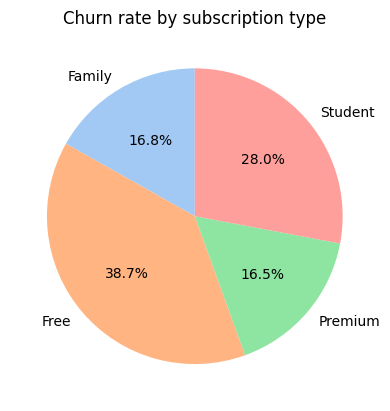

In [64]:
# Churn rate by subscription type:
df_subs_type_churn = df.groupby('subscription_type')['churned'].mean().reset_index()
plt.pie(x = df_subs_type_churn['churned'], labels=df_subs_type_churn['subscription_type'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title(f'Churn rate by subscription type')
plt.show()

In [65]:
df_copy = df.copy()

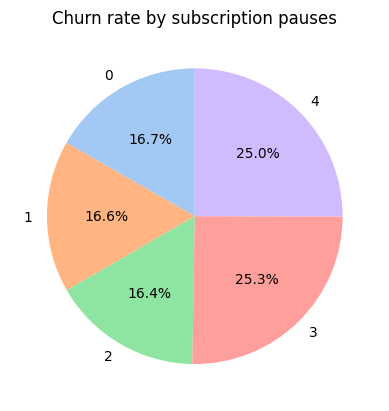

In [66]:
df_pause_churn = df.groupby('num_subscription_pauses')['churned'].mean().reset_index()

plt.pie(
    x=df_pause_churn['churned'],
    labels=df_pause_churn['num_subscription_pauses'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)

plt.title('Churn rate by subscription pauses')
plt.show()

In [67]:
df.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32,Montana,Free,Yearly,2,Paypal,Medium,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64,New Jersey,Free,Monthly,3,Paypal,Low,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51,Washington,Premium,Yearly,2,Credit Card,High,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63,California,Family,Yearly,4,Apple Pay,Medium,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54,Washington,Family,Monthly,3,Paypal,High,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


/tmp/ipython-input-273577771.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weekly_hours_churn = df_copy.groupby('weekly_hours_bin')['churned'].mean().reset_index()


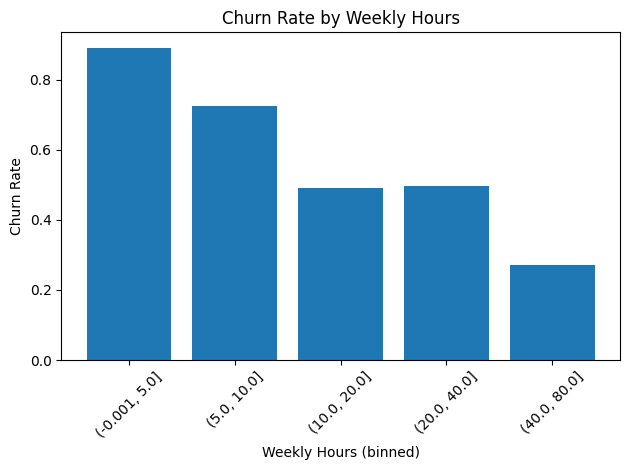

In [68]:
df_copy['weekly_hours_bin'] = pd.cut(
    df['weekly_hours'],
    bins=[0, 5, 10, 20, 40, 80],
    include_lowest=True
)

df_weekly_hours_churn = df_copy.groupby('weekly_hours_bin')['churned'].mean().reset_index()


plt.figure()
plt.bar(df_weekly_hours_churn['weekly_hours_bin'].astype(str),df_weekly_hours_churn['churned'])

plt.xlabel('Weekly Hours (binned)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Weekly Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
df.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32,Montana,Free,Yearly,2,Paypal,Medium,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64,New Jersey,Free,Monthly,3,Paypal,Low,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51,Washington,Premium,Yearly,2,Credit Card,High,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63,California,Family,Yearly,4,Apple Pay,Medium,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54,Washington,Family,Monthly,3,Paypal,High,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


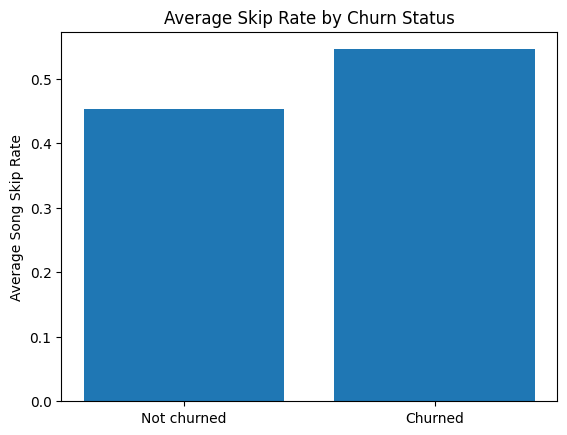

In [70]:
mean_skip = df.groupby('churned')['song_skip_rate'].mean().reset_index()


plt.bar(['Not churned', 'Churned'],mean_skip['song_skip_rate'])

plt.ylabel('Average Song Skip Rate')
plt.title('Average Skip Rate by Churn Status')
plt.show()

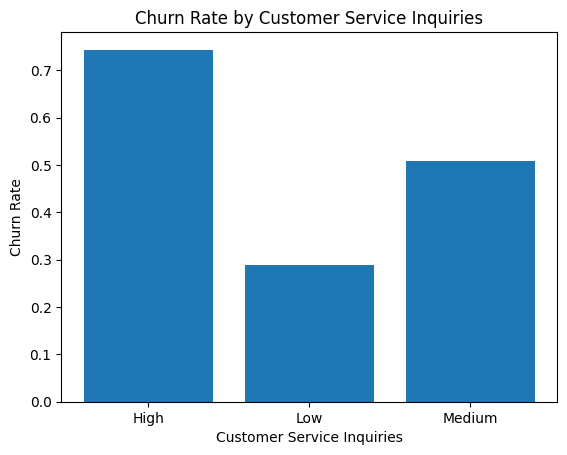

In [71]:
df_cs_churn = df.groupby('customer_service_inquiries')['churned'].mean().reset_index()
plt.bar(df_cs_churn['customer_service_inquiries'],df_cs_churn['churned'])

plt.xlabel('Customer Service Inquiries')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Service Inquiries')
plt.show()

In [73]:
age_churn

,age_group,churned
0,"(18, 25]",0.598383
1,"(25, 35]",0.501597
2,"(35, 45]",0.407454
3,"(45, 55]",0.405360
4,"(55, 65]",0.514961
5,"(65, 79]",0.622836


/tmp/ipython-input-392609787.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df_copy.groupby('age_group')['churned'].mean().reset_index()


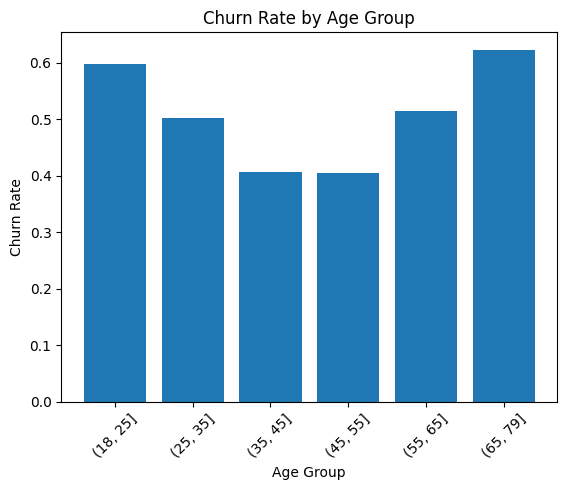

In [72]:
df_copy['age_group'] = pd.cut(df_copy['age'], bins=[18,25,35,45,55,65,79])

age_churn = df_copy.groupby('age_group')['churned'].mean().reset_index()

# Plot
plt.bar(age_churn['age_group'].astype(str), age_churn['churned'])
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

### These plots are high significant plots.